# Prueba Técnica - Modelo Supervistado - Classificación

## 1. Importación de Librerias

In [3]:
# Loading some basic libraries to work
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport


## 1.1 Carga de datos

In [4]:
# Loading dataset using the ISO 8859-1 for the Latin Alphabet
tigo_df_v1 = pd.read_csv("prueba_2.csv", sep=';', delimiter=None,encoding='ISO-8859-1')

tigo_df_v1

id  voice_min_used  voice_num_calls  sms_used data_mb_used  \
0           463           2.567                2         0       84.417   
1           465           0.000                0         0        0.000   
2           495           0.000                0         0       17.654   
3           466          13.483                5         0      275.018   
4           467           0.000                0         0      173.531   
...         ...             ...              ...       ...          ...   
26963  15255274           0.000                0         0        0.000   
26964  15522415           0.000                0         0        0.001   
26965   8698502           0.000                0         0       18.914   
26966  10052528           4.350                2         0        0.000   
26967  14419434           0.000                0         0        0.000   

       data_active  revenue  network_active  antigüedad_cliente digital_user  \
0                1     0.00               1                4490           SI   
1                0     0.00               0                4486           SI   
2                1     0.35               1                4427           SI   
3                1     0.00               1                4483           SI   
4                1     0.00               1                4482           SI   
...            ...      ...             ...                 ...          ...   
26963            0     0.00               1                  90           SI   
26964            1     0.00               1                  66           SI   
26965            1     0.00               1                1602           SI   
26966            0     0.00               1                1317           SI   
26967            0     0.00               0                 174           NO   

       clase  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
26963      2  
26964      2  
26965      2  
26966      2  
26967      2  

[26968 rows x 11 columns]

## 2. Analisis exploratorio de datos (EDA)


In [ ]:
#We have to analyze why "data_mb_used" its a categorical column.
profile = ProfileReport(tigo_df_v1, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

: 

: 

# 3. Procesamiento de Datos

## 3.1 Limpieza de datos

## 3.1.1 Eliminación de los nulos

In [5]:
# No Null values in the data
tigo_df_v1.isnull().sum()

id                    0
voice_min_used        0
voice_num_calls       0
sms_used              0
data_mb_used          0
data_active           0
revenue               0
network_active        0
antigüedad_cliente    0
digital_user          0
clase                 0
dtype: int64

#### Transformando la columna de datos usados a numerico ya que se uso puntuación para miles y para los milesimos.

In [6]:
#Removing the "." dots and transforming into a numerical value
tigo_df_v1['data_mb_used'] = tigo_df_v1['data_mb_used'].str.replace('.', '')
tigo_df_v1['data_mb_used'] = pd.to_numeric(tigo_df_v1['data_mb_used'])
tigo_df_v1

C:\Users\JoseLuis\AppData\Local\Temp\ipykernel_19352\3570491035.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tigo_df_v1['data_mb_used'] = tigo_df_v1['data_mb_used'].str.replace('.', '')


id  voice_min_used  voice_num_calls  sms_used  data_mb_used  \
0           463           2.567                2         0         84417   
1           465           0.000                0         0             0   
2           495           0.000                0         0         17654   
3           466          13.483                5         0        275018   
4           467           0.000                0         0        173531   
...         ...             ...              ...       ...           ...   
26963  15255274           0.000                0         0             0   
26964  15522415           0.000                0         0             1   
26965   8698502           0.000                0         0         18914   
26966  10052528           4.350                2         0             0   
26967  14419434           0.000                0         0             0   

       data_active  revenue  network_active  antigüedad_cliente digital_user  \
0                1     0.00               1                4490           SI   
1                0     0.00               0                4486           SI   
2                1     0.35               1                4427           SI   
3                1     0.00               1                4483           SI   
4                1     0.00               1                4482           SI   
...            ...      ...             ...                 ...          ...   
26963            0     0.00               1                  90           SI   
26964            1     0.00               1                  66           SI   
26965            1     0.00               1                1602           SI   
26966            0     0.00               1                1317           SI   
26967            0     0.00               0                 174           NO   

       clase  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
26963      2  
26964      2  
26965      2  
26966      2  
26967      2  

[26968 rows x 11 columns]

In [7]:
#Fixing the numbers to have the milsims back.
tigo_df_v1['data_mb_used'] = tigo_df_v1['data_mb_used']/1000
tigo_df_v1

id  voice_min_used  voice_num_calls  sms_used  data_mb_used  \
0           463           2.567                2         0        84.417   
1           465           0.000                0         0         0.000   
2           495           0.000                0         0        17.654   
3           466          13.483                5         0       275.018   
4           467           0.000                0         0       173.531   
...         ...             ...              ...       ...           ...   
26963  15255274           0.000                0         0         0.000   
26964  15522415           0.000                0         0         0.001   
26965   8698502           0.000                0         0        18.914   
26966  10052528           4.350                2         0         0.000   
26967  14419434           0.000                0         0         0.000   

       data_active  revenue  network_active  antigüedad_cliente digital_user  \
0                1     0.00               1                4490           SI   
1                0     0.00               0                4486           SI   
2                1     0.35               1                4427           SI   
3                1     0.00               1                4483           SI   
4                1     0.00               1                4482           SI   
...            ...      ...             ...                 ...          ...   
26963            0     0.00               1                  90           SI   
26964            1     0.00               1                  66           SI   
26965            1     0.00               1                1602           SI   
26966            0     0.00               1                1317           SI   
26967            0     0.00               0                 174           NO   

       clase  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
26963      2  
26964      2  
26965      2  
26966      2  
26967      2  

[26968 rows x 11 columns]

In [8]:
#Cientific notation remover
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)


## 4. Analisis estadístico de clases

In [9]:
#exporting to csv
#Analisis_por_Clase.to_csv("Clases.csv")

In [10]:
tigo_df_aux = tigo_df_v1.copy()
tigo_df_aux = pd.get_dummies(tigo_df_aux,columns=["digital_user"])
tigo_df_aux = tigo_df_aux.drop("id",axis=1)
Analisis_por_Clase = tigo_df_aux.groupby("clase").agg([np.mean, np.median, min, max])
Analisis_por_Clase

voice_min_used                    voice_num_calls                 \
                mean median  min    max            mean median min max   
clase                                                                    
0               3.50   0.45 0.00 228.35            2.08   1.00   0  53   
1               2.85   0.15 0.00  35.55            1.53   1.00   0  12   
2               0.05   0.00 0.00  38.78            0.02   0.00   0   7   

      sms_used                data_mb_used                      data_active  \
          mean median min max         mean median  min      max        mean   
clase                                                                         
0         0.06   0.00   0  43       515.73 175.80 0.00 27833.33        0.87   
1         0.01   0.00   0   1       435.84 103.46 0.00  6897.70        0.78   
2         0.00   0.00   0   0         4.52   0.00 0.00  1772.61        0.27   

                     revenue                   network_active                 \
      median min max    mean median  min   max           mean median min max   
clase                                                                          
0       1.00   0   1    0.62   0.00 0.00 61.16           0.89   1.00   0   1   
1       1.00   0   1    0.96   0.00 0.00 14.00           0.86   1.00   0   1   
2       0.00   0   1    0.01   0.00 0.00 41.00           0.75   1.00   0   1   

      antigüedad_cliente                   digital_user_NO                 \
                    mean  median min   max            mean median min max   
clase                                                                       
0                1818.90 1372.50   0  9180            0.07   0.00   0   1   
1                 606.82  256.50   1  4710            0.21   0.00   0   1   
2                 971.42  411.50  50  8228            0.08   0.00   0   1   

      digital_user_SI                 
                 mean median min max  
clase                                 
0                0.93   1.00   0   1  
1                0.79   1.00   0   1  
2                0.92   1.00   0   1

## Analisis descriptivo de clases

#### Clase 0 (20262 usuarios): La clase mas proliferada, consumen muchos más que las demas clases y tienen la mayor taza de consumo de megas y conectividad en la red, son clientes antiguos que al igual consumen las aplicaciones de la compañia. Los gastos adicionales son variados pero su media sigue siendo inferior a la clase 1.
#### Clase 1 (98 usuarios): Usuario de bajo consumo de recursos, pero consumo de megas medio, son estan activos en la red y tienden a generar un gasto extra aunque no parece ser significante (Se desconoce la escala del revenue), tienen antiguedades variadas y al menos el 21% no ocupa aplicaciones digitales de la compañia.
#### Clase 2 (6608 usuarios): Usuarios de bajo consumo en los ultimos 30 dias, aun asi existe un pequeño uso de megas. No producen gastos extras aunque si estuvieron conectados a una red en los ultimos 30 dias. Cuentan con antiguedad y ocupan aplicaciones digitales de la compañia.

In [11]:
tigo_df_v1[tigo_df_v1["clase"] == 1]

id  voice_min_used  voice_num_calls  sms_used  data_mb_used  \
20262   6913249            0.00                0         0        809.58   
20263  15467787            0.00                0         0         18.73   
20264  11169071            0.00                0         0        823.58   
20265  15968549            0.00                0         0          0.00   
20266   9285135           11.17                5         0        141.31   
...         ...             ...              ...       ...           ...   
20355  16067217            0.00                0         0          0.00   
20356  15589267            3.07                5         0        456.75   
20357  10600963            4.85                2         0         15.55   
20358  11990537            0.00                0         0          0.00   
20359  13440401            0.00                0         0          0.00   

       data_active  revenue  network_active  antigüedad_cliente digital_user  \
20262            1     0.00               1                1850           SI   
20263            1     0.00               1                  70           NO   
20264            1     0.00               1                 724           SI   
20265            0     0.00               1                  22           NO   
20266            1     1.69               1                1513           SI   
...            ...      ...             ...                 ...          ...   
20355            0     0.00               0                  13           SI   
20356            1     0.48               1                  59           SI   
20357            1     0.00               1                 522           SI   
20358            0     0.00               1                 493           SI   
20359            0     0.00               1                 286           SI   

       clase  
20262      1  
20263      1  
20264      1  
20265      1  
20266      1  
...      ...  
20355      1  
20356      1  
20357      1  
20358      1  
20359      1  

[98 rows x 11 columns]

In [12]:
#Ugly but works
tigo_df_v1.groupby(["clase"]).count()

id  voice_min_used  voice_num_calls  sms_used  data_mb_used  \
clase                                                                   
0      20262           20262            20262     20262         20262   
1         98              98               98        98            98   
2       6608            6608             6608      6608          6608   

       data_active  revenue  network_active  antigüedad_cliente  digital_user  
clase                                                                          
0            20262    20262           20262               20262         20262  
1               98       98              98                  98            98  
2             6608     6608            6608                6608          6608

## 4.1 Diagramas

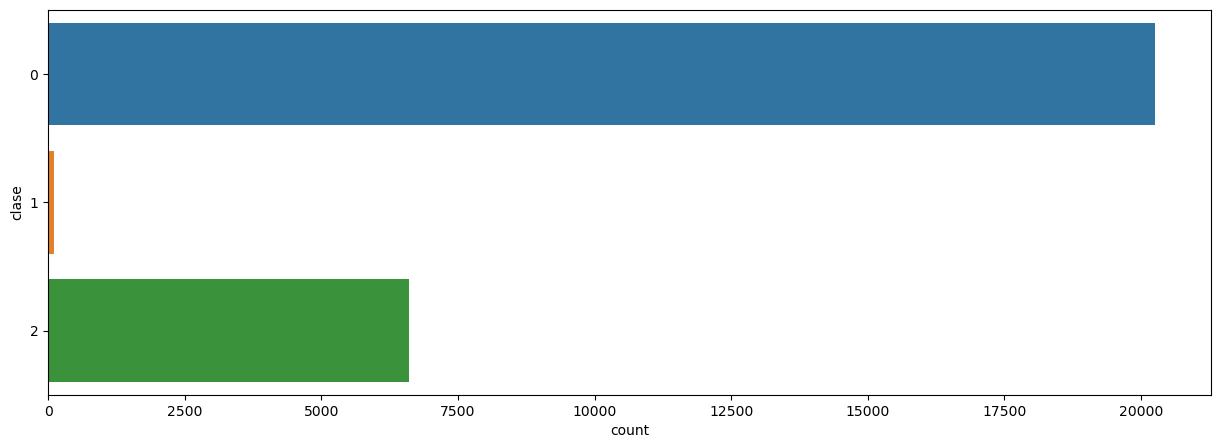

In [13]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'clase' , data = tigo_df_v1)
plt.show()

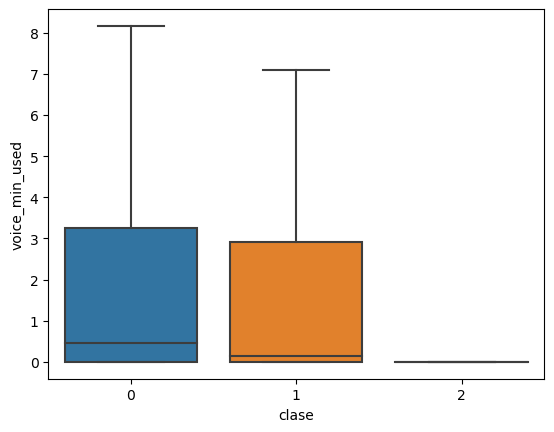

In [14]:
sns.boxplot( x=tigo_df_v1["clase"], y=tigo_df_v1["voice_min_used"], showfliers=False);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

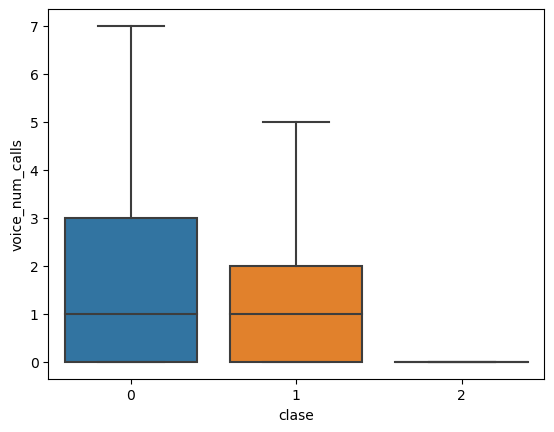

In [13]:
sns.boxplot( x=tigo_df_v1["clase"], y=tigo_df_v1["voice_num_calls"], showfliers=False);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

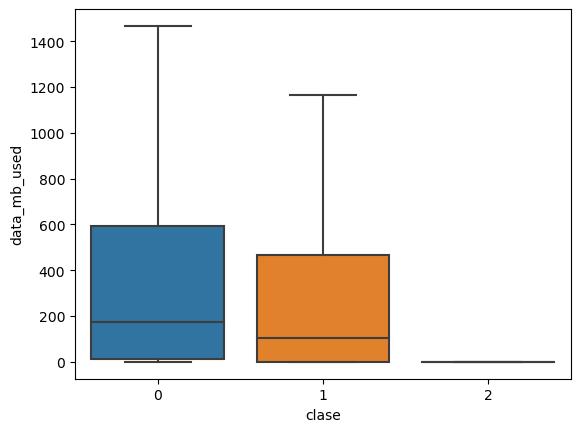

In [14]:
sns.boxplot( x=tigo_df_v1["clase"], y=tigo_df_v1["data_mb_used"], showfliers=False);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

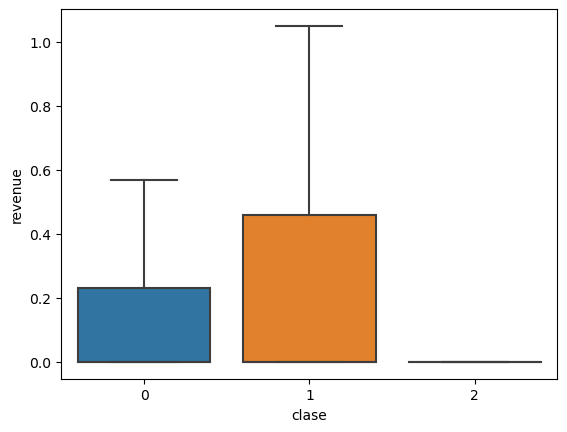

In [15]:
sns.boxplot( x=tigo_df_v1["clase"], y=tigo_df_v1["revenue"], showfliers=False);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

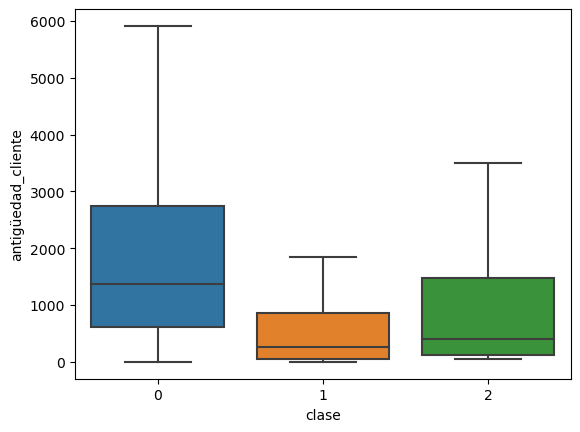

In [ ]:
sns.boxplot( x=tigo_df_v1["clase"], y=tigo_df_v1["antigüedad_cliente"], showfliers=False);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

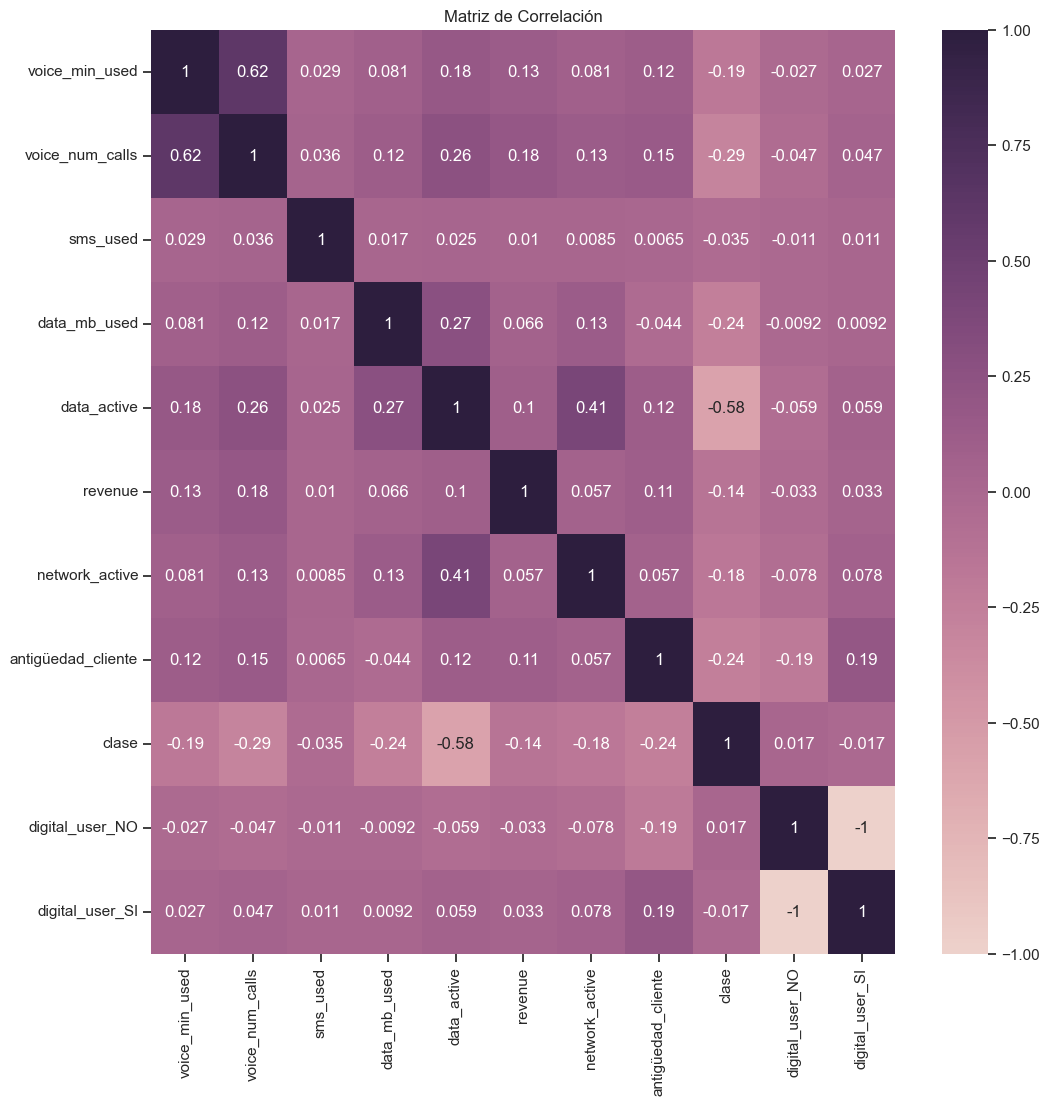

In [ ]:
# Correlation matrix
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(tigo_df_aux.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True)).set(title='Matriz de Correlación')
plt.show()

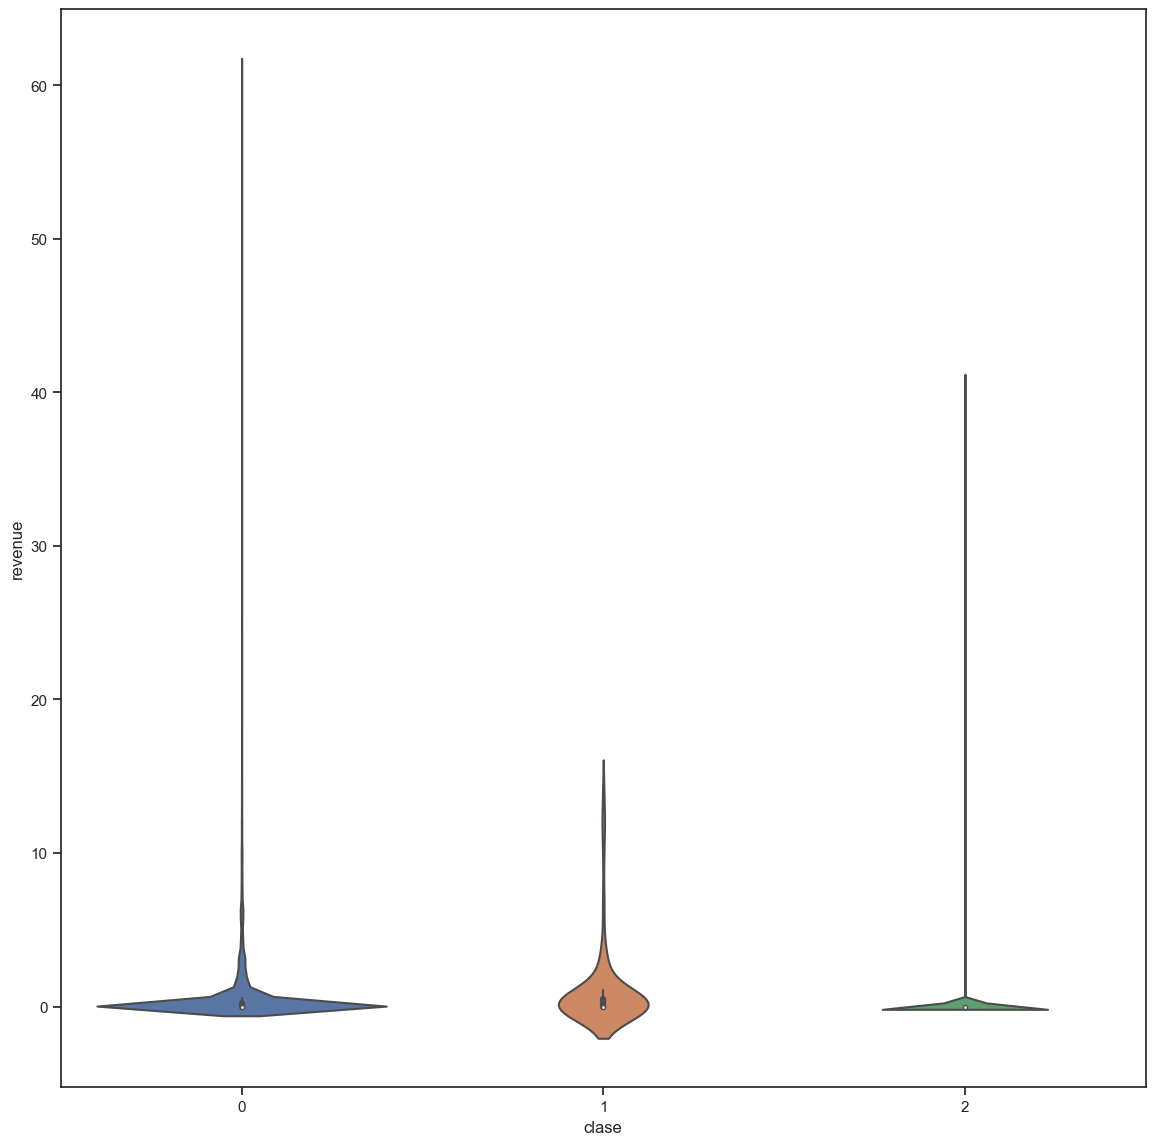

In [84]:
#Revenue analysis
plt.figure(figsize=(14, 14))
sns.violinplot(data=tigo_df_v1, x="clase", y="revenue")
# Display the plot
plt.show()

# 5. Desarrollo de Modelos Predictivos

### Función para el grabado de datos 

In [292]:
results = pd.DataFrame(columns=["Model","F1","Recall","Precision","Accuracy"])
def make_results(model_name, model_object):
    #Note: Model_Name is just a string for the name.
    cv_results = pd.DataFrame(model_object.cv_results_)
    #Calling just the one with highest mean f1
    best_estimator_results = cv_results.iloc[cv_results["mean_test_recall_weighted"].idxmax(),:]
    f1 = best_estimator_results.mean_test_f1_weighted
    recall = best_estimator_results.mean_test_recall_weighted
    accuracy = best_estimator_results.mean_test_accuracy
    evaluation_results = {"Model": model_name, "F1": f1, "Precision": precision, "Accuracy": accuracy}
    df_results = pd.DataFrame(evaluation_results, index=[0])
    data = pd.DataFrame()
    data = pd.concat([data, df_results], ignore_index=True)
    return data

## 5.1 Tree Model con optimización de CV

### 5.1.1 Cargo de Librerias

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, make_scorer


### 5.1.2 Preparación de datos de modelo

In [99]:
tigo_df_model = tigo_df_v1.copy()
tigo_df_model = pd.get_dummies(tigo_df_model, columns=["digital_user"])
tigo_df_model = pd.get_dummies(tigo_df_model, columns=["data_active"])
tigo_df_model = pd.get_dummies(tigo_df_model, columns=["network_active"])
tigo_df_model = tigo_df_model.drop("id",axis=1)
tigo_df_model


voice_min_used  voice_num_calls  sms_used  data_mb_used  revenue   
0                2.57                2         0         84.42     0.00  \
1                0.00                0         0          0.00     0.00   
2                0.00                0         0         17.65     0.35   
3               13.48                5         0        275.02     0.00   
4                0.00                0         0        173.53     0.00   
...               ...              ...       ...           ...      ...   
26963            0.00                0         0          0.00     0.00   
26964            0.00                0         0          0.00     0.00   
26965            0.00                0         0         18.91     0.00   
26966            4.35                2         0          0.00     0.00   
26967            0.00                0         0          0.00     0.00   

       antigüedad_cliente  clase  digital_user_NO  digital_user_SI   
0                    4490      0            False             True  \
1                    4486      0            False             True   
2                    4427      0            False             True   
3                    4483      0            False             True   
4                    4482      0            False             True   
...                   ...    ...              ...              ...   
26963                  90      2            False             True   
26964                  66      2            False             True   
26965                1602      2            False             True   
26966                1317      2            False             True   
26967                 174      2             True            False   

       data_active_0  data_active_1  network_active_0  network_active_1  
0              False           True             False              True  
1               True          False              True             False  
2              False           True             False              True  
3              False           True             False              True  
4              False           True             False              True  
...              ...            ...               ...               ...  
26963           True          False             False              True  
26964          False           True             False              True  
26965          False           True             False              True  
26966           True          False             False              True  
26967           True          False              True             False  

[26968 rows x 13 columns]

In [100]:
y = tigo_df_model["clase"]
X = tigo_df_model.copy()
X = X.drop("clase",axis=1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

### 5.1.3 Desarrollo de modelo inicial

In [104]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train,y_train)
dt_pred = decision_tree.predict(X_test)

### 5.1.4 Puntuación del modelo inicial y Confusión Matrix

In [155]:
average = "weighted"
accuracy = accuracy_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred, average=average)
precision = precision_score(y_test, dt_pred, average=average)
f1 = f1_score(y_test, dt_pred, average=average)
print("accuracy_score:", accuracy)
print("recall_score:", recall)
print("precision_score:", precision)
print("f1_score:", f1)

accuracy_score: 0.8590922574903589
recall_score: 0.8590922574903589
precision_score: 0.860766015328824
f1_score: 0.8599278460118539


In [105]:
#Defining a confusion matrix function to stop doing it all the time.
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_ )
    disp.plot()
    plt.show()

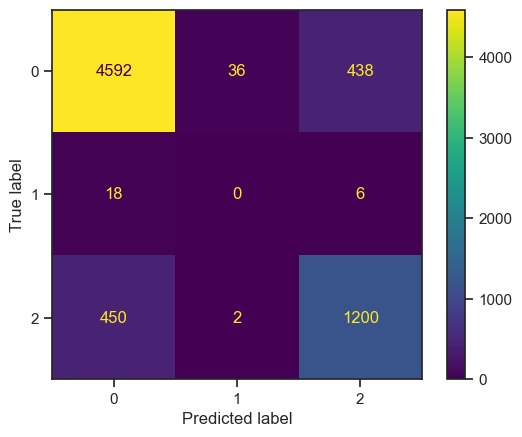

In [106]:
conf_matrix_plot(decision_tree, X_test, y_test)

### Vista preliminar del modelo

<function matplotlib.pyplot.show(close=None, block=None)>

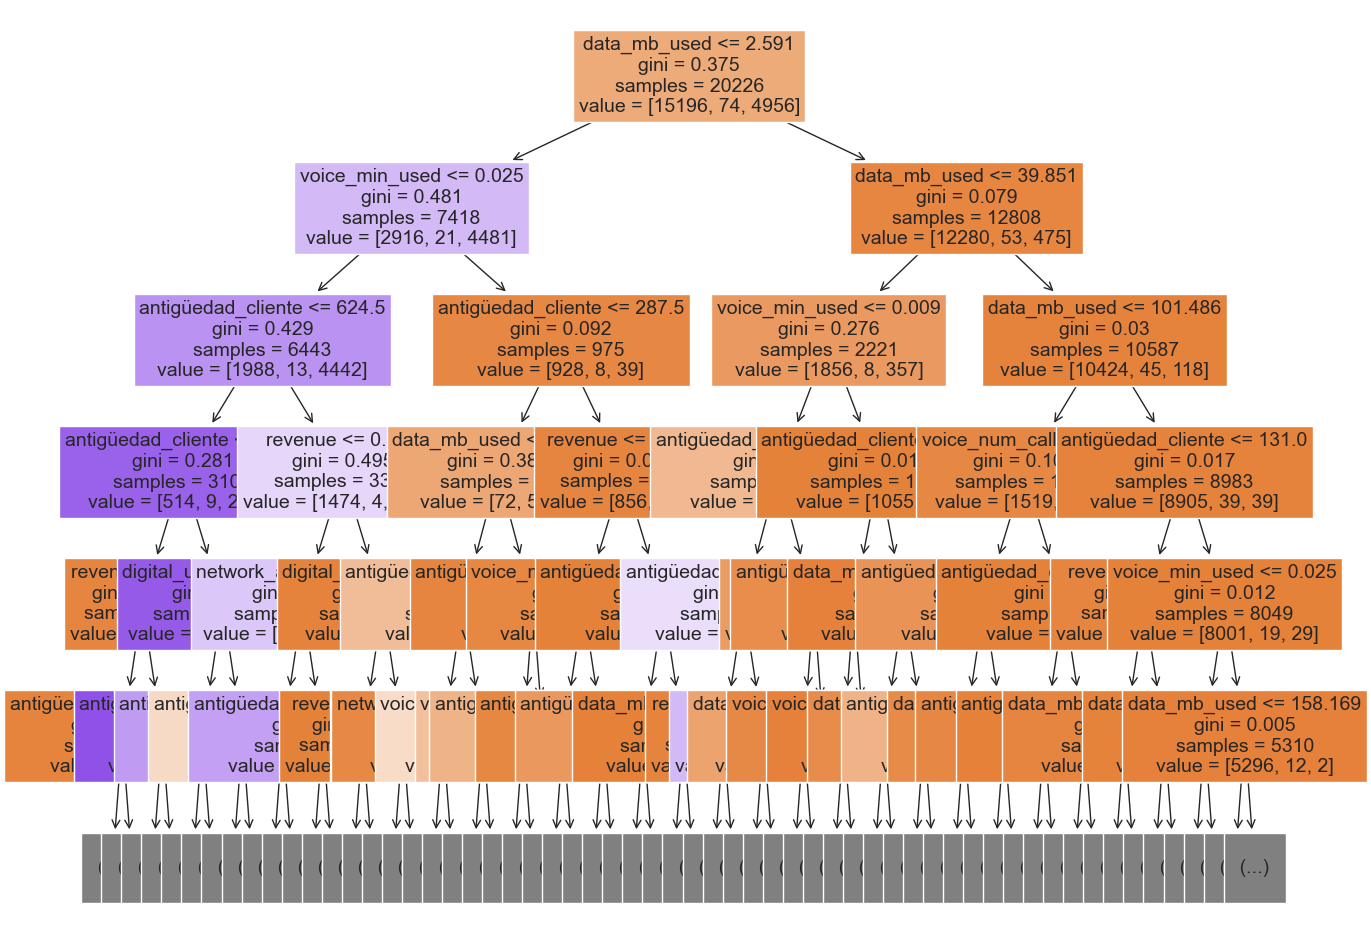

In [110]:
#Plotting the tree
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=5, fontsize=14, feature_names=X.columns, filled=True);
plt.show

### 5.1.5 Optimización de parametros por GridSearchCV

In [117]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Defining parameters to test
tree_para = {"max_depth":[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
              "min_samples_leaf": [2,5,10,20,50]}
scoring = {"accuracy":make_scorer(accuracy_score),
           "recall_weighted":make_scorer(recall_score, average='weighted'),
           "precision_weighted":make_scorer(precision_score, average='weighted'),
           "f1_weighted":make_scorer(f1_score, average='weighted')}

In [181]:
tuned_decision_tree = DecisionTreeClassifier(random_state=42)
clf=GridSearchCV(tuned_decision_tree,
                 tree_para,
                 scoring=scoring,
                 cv=5,
                 refit="f1_weighted"
                 )
clf.fit(X_train,y_train)

c:\Users\JoseLuis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoseLuis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoseLuis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\JoseLuis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1_weighted',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_weighted': make_scorer(f1_score, average=weighted),
                      'precision_weighted': make_scorer(precision_score, average=weighted),
                      'recall_weighted': make_scorer(recall_score, average=weighted)})

### 5.1.6 Modelo Optimizado

In [203]:
# Best Model found
clf.best_estimator_


DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=42)

In [204]:
print("Best Avg.Validation score: ", "%.4f" % clf.best_score_)

Best Avg.Validation score:  0.8994


### Base de datos con los modelos probados

In [198]:
results = clf.cv_results_
results_df = pd.DataFrame(results)
results_df.sort_values(by="rank_test_f1_weighted", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time   
17           0.03          0.00             0.01            0.00  \
16           0.03          0.00             0.01            0.00   
15           0.03          0.00             0.01            0.00   
21           0.03          0.00             0.01            0.00   
33           0.04          0.00             0.01            0.00   
..            ...           ...              ...             ...   
66           0.04          0.00             0.01            0.00   
50           0.04          0.00             0.01            0.00   
55           0.04          0.00             0.01            0.00   
60           0.04          0.00             0.01            0.00   
65           0.04          0.00             0.01            0.00   

   param_max_depth param_min_samples_leaf   
17               7                     10  \
16               7                      5   
15               7                      2   
21               8                      5   
33              10                     20   
..             ...                    ...   
66              50                      5   
50              20                      2   
55              30                      2   
60              40                      2   
65              50                      2   

                                       params  split0_test_accuracy   
17   {'max_depth': 7, 'min_samples_leaf': 10}                  0.90  \
16    {'max_depth': 7, 'min_samples_leaf': 5}                  0.90   
15    {'max_depth': 7, 'min_samples_leaf': 2}                  0.90   
21    {'max_depth': 8, 'min_samples_leaf': 5}                  0.90   
33  {'max_depth': 10, 'min_samples_leaf': 20}                  0.90   
..                                        ...                   ...   
66   {'max_depth': 50, 'min_samples_leaf': 5}                  0.88   
50   {'max_depth': 20, 'min_samples_leaf': 2}                  0.88   
55   {'max_depth': 30, 'min_samples_leaf': 2}                  0.87   
60   {'max_depth': 40, 'min_samples_leaf': 2}                  0.87   
65   {'max_depth': 50, 'min_samples_leaf': 2}                  0.87   

    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy   
17                  0.90                  0.90                  0.90  \
16                  0.90                  0.90                  0.90   
15                  0.90                  0.90                  0.89   
21                  0.90                  0.90                  0.90   
33                  0.90                  0.90                  0.90   
..                   ...                   ...                   ...   
66                  0.89                  0.87                  0.88   
50                  0.88                  0.87                  0.88   
55                  0.87                  0.86                  0.88   
60                  0.87                  0.86                  0.88   
65                  0.87                  0.86                  0.88   

    split4_test_accuracy  mean_test_accuracy  std_test_accuracy   
17                  0.90                0.90               0.00  \
16                  0.90                0.90               0.00   
15                  0.90                0.90               0.00   
21                  0.90                0.90               0.00   
33                  0.90                0.90               0.00   
..                   ...                 ...                ...   
66                  0.88                0.88               0.00   
50                  0.87                0.87               0.01   
55                  0.87                0.87               0.01   
60                  0.87                0.87               0.01   
65                  0.87                0.87               0.01   

    rank_test_accuracy  split0_test_recall_weighted   
17                   1                         0.90  \
16           

# Diagrama de arbol del modelo optimizado

<function matplotlib.pyplot.show(close=None, block=None)>

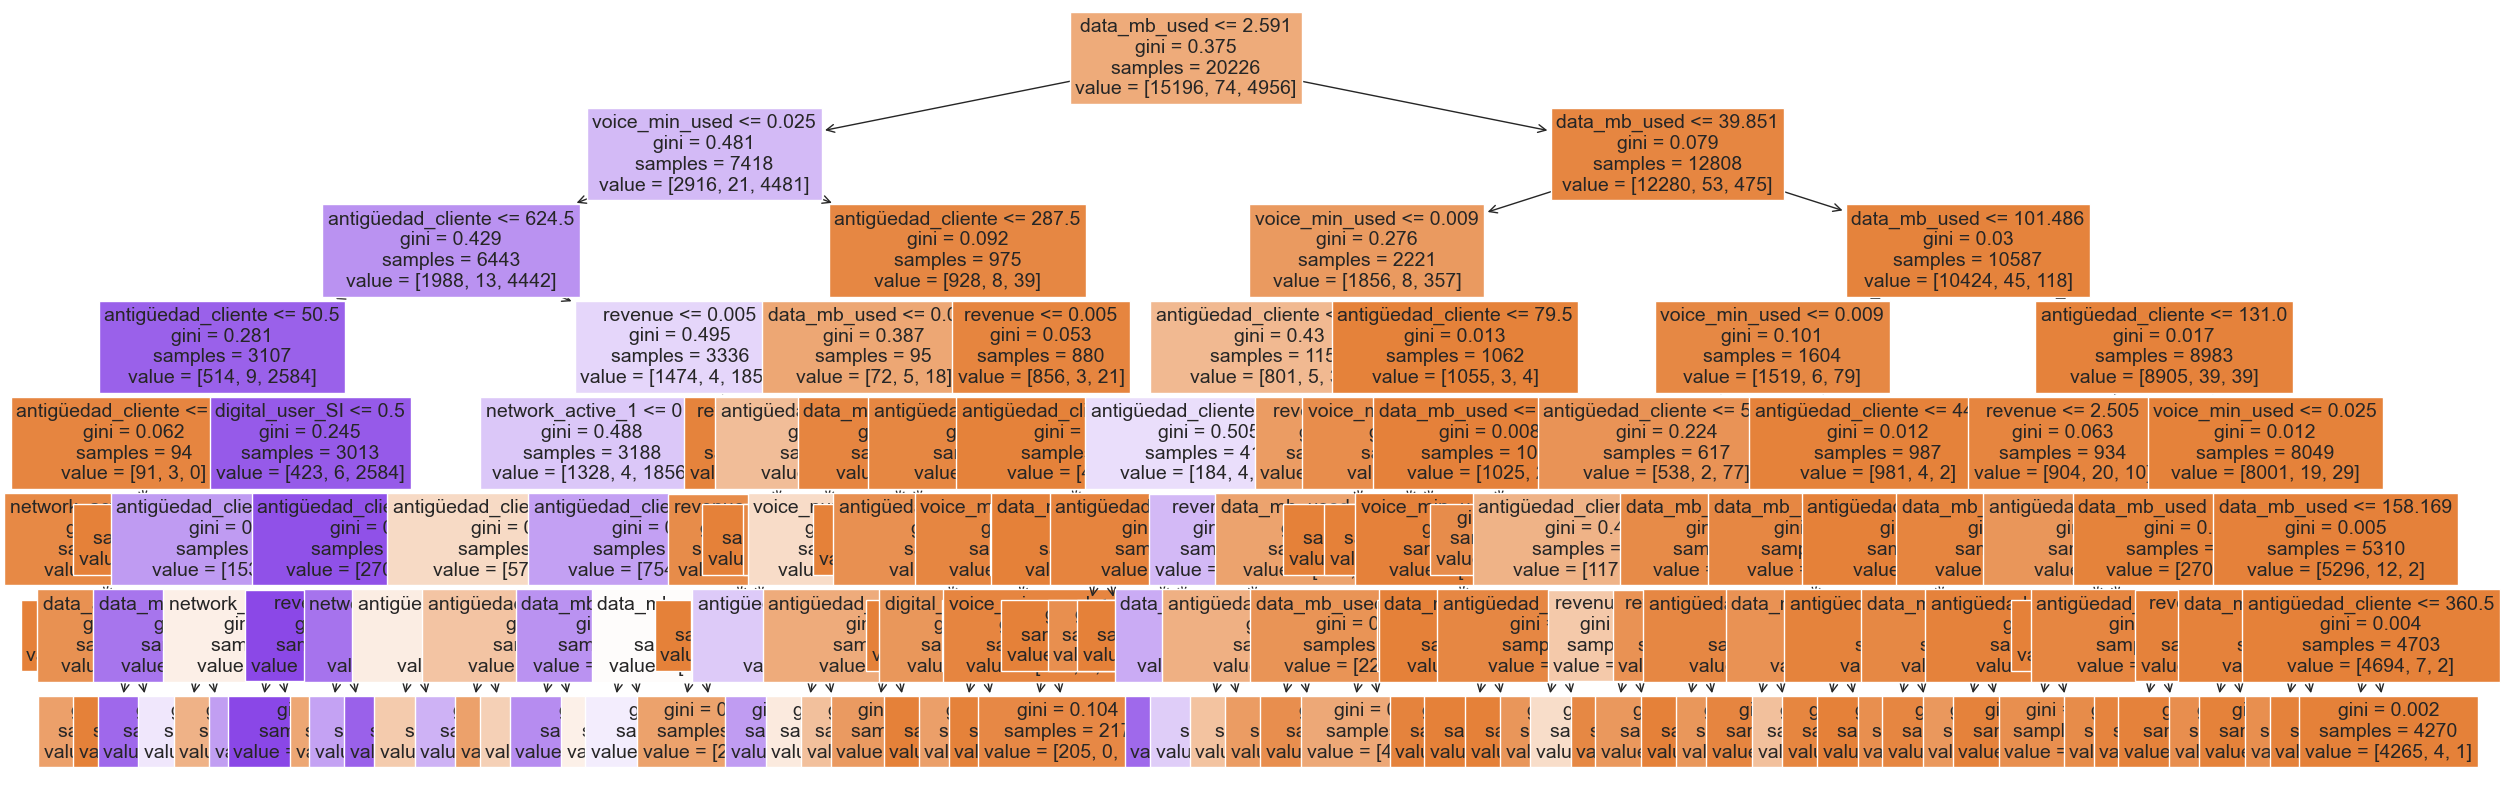

In [200]:
plt.figure(figsize=(30,10))
plot_tree(clf.best_estimator_, max_depth=8, fontsize=14, feature_names=X.columns, filled=True);
plt.show


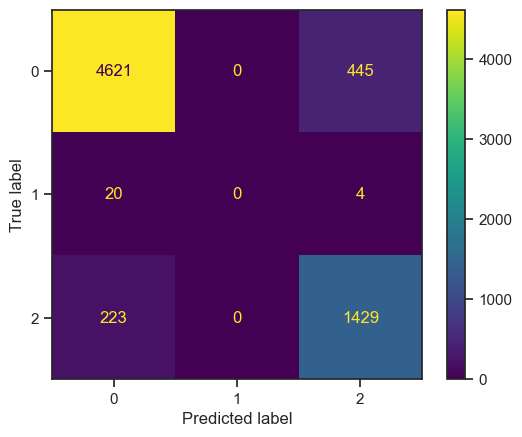

In [202]:
conf_matrix_plot(clf.best_estimator_, X_test, y_test)

In [206]:
best_pred = clf.best_estimator_.predict(X_test)
average = "weighted"
accuracy = accuracy_score(y_test, best_pred)
recall = recall_score(y_test, best_pred, average=average)
precision = precision_score(y_test, best_pred, average=average)
f1 = f1_score(y_test, best_pred, average=average)
print("accuracy_score:", accuracy)
print("recall_score:", recall)
print("precision_score:", precision)
print("f1_score:", f1)

accuracy_score: 0.8973598338771878
recall_score: 0.8973598338771878
precision_score: 0.9003176089833236
f1_score: 0.8977326950814949


c:\Users\JoseLuis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [337]:
results = make_results("Decision Tree con Optimización por GridSearchCV",clf)
results

Model   F1  Precision  Accuracy
0  Decision Tree con Optimización por GridSearchCV 0.90       0.90      0.90

### El modelo mejoro considerablemente, aun asi tiene carencias al reconocer la clase 1, ya que es la que tiene menor presencia, se requiere más tiempo o muestras para desarrollar un modelo más preciso.

## 5.2 Random Forest Classifier con optimización por GridSearch

### 5.2.1 Cargado de librerias

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, make_scorer
from pactools.grid_search import GridSearchCVProgressBar

### 5.2.2 Preparación de datos de modelo

In [208]:
tigo_df_model2 = tigo_df_v1.copy()
tigo_df_model2 = pd.get_dummies(tigo_df_model2, columns=["digital_user"])
tigo_df_model2 = pd.get_dummies(tigo_df_model2, columns=["data_active"])
tigo_df_model2 = pd.get_dummies(tigo_df_model2, columns=["network_active"])
tigo_df_model2 = tigo_df_model2.drop("id",axis=1)
tigo_df_model2


voice_min_used  voice_num_calls  sms_used  data_mb_used  revenue   
0                2.57                2         0         84.42     0.00  \
1                0.00                0         0          0.00     0.00   
2                0.00                0         0         17.65     0.35   
3               13.48                5         0        275.02     0.00   
4                0.00                0         0        173.53     0.00   
...               ...              ...       ...           ...      ...   
26963            0.00                0         0          0.00     0.00   
26964            0.00                0         0          0.00     0.00   
26965            0.00                0         0         18.91     0.00   
26966            4.35                2         0          0.00     0.00   
26967            0.00                0         0          0.00     0.00   

       antigüedad_cliente  clase  digital_user_NO  digital_user_SI   
0                    4490      0            False             True  \
1                    4486      0            False             True   
2                    4427      0            False             True   
3                    4483      0            False             True   
4                    4482      0            False             True   
...                   ...    ...              ...              ...   
26963                  90      2            False             True   
26964                  66      2            False             True   
26965                1602      2            False             True   
26966                1317      2            False             True   
26967                 174      2             True            False   

       data_active_0  data_active_1  network_active_0  network_active_1  
0              False           True             False              True  
1               True          False              True             False  
2              False           True             False              True  
3              False           True             False              True  
4              False           True             False              True  
...              ...            ...               ...               ...  
26963           True          False             False              True  
26964          False           True             False              True  
26965          False           True             False              True  
26966           True          False             False              True  
26967           True          False              True             False  

[26968 rows x 13 columns]

In [209]:
y = tigo_df_model2["clase"]
X = tigo_df_model2.copy()
X = X.drop("clase",axis=1)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

### 5.2.2 Preparación de modelo inicial

In [222]:
cv_params = {"max_depth":[5,6,7,8,9,10,11,None],
             "min_samples_leaf":[1,2,5,10],
             "min_samples_split":[2,3,4,5],
             "max_features":[2,3,4],
             "n_estimators":[75,100]
             }
rf = RandomForestClassifier(random_state=0, n_jobs=-1 , n_estimators=16)
scoring = {"accuracy":make_scorer(accuracy_score),
           "recall_weighted":make_scorer(recall_score, average='weighted'),
           "f1_weighted":make_scorer(f1_score, average='weighted')}
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5,refit="f1_weighted", verbose=5)

rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=75; accuracy: (test=0.873) f1_weighted: (test=0.873) recall_weighted: (test=0.873) total time=   2.4s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=75; accuracy: (test=0.877) f1_weighted: (test=0.877) recall_weighted: (test=0.877) total time=   0.4s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=75; accuracy: (test=0.873) f1_weighted: (test=0.873) recall_weighted: (test=0.873) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=75; accuracy: (test=0.872) f1_weighted: (test=0.872) recall_weighted: (test=0.872) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=75; accuracy: (test=0.875) f1_weighted: (test=0.

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=16, n_jobs=-1,
                                              random_state=0),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [75, 100]},
             refit='f1_weighted',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_weighted': make_scorer(f1_score, average=weighted),
                      'recall_weighted': make_scorer(recall_score, average=weighted)},
             verbose=5)

### Datos del mejor modelo conseguido

In [223]:
rf_cv.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 75}

In [224]:
print("Best Avg.Validation score: ", "%.4f" % rf_cv.best_score_)
### Base de datos con los modelos probados

Best Avg.Validation score:  0.9026


In [225]:
### Base de datos con los modelos probados
results = rf_cv.cv_results_
results_df = pd.DataFrame(results)
results_df.sort_values(by="rank_test_f1_weighted", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time   
460           0.11          0.00             0.02            0.00  \
458           0.11          0.00             0.02            0.00   
456           0.11          0.00             0.02            0.00   
479           0.14          0.02             0.03            0.00   
473           0.14          0.01             0.03            0.00   
..             ...           ...              ...             ...   
23            0.11          0.01             0.03            0.00   
29            0.10          0.00             0.03            0.00   
27            0.10          0.00             0.03            0.00   
25            0.10          0.00             0.03            0.00   
31            0.10          0.00             0.03            0.00   

    param_max_depth param_max_features param_min_samples_leaf   
460               9                  4                      2  \
458               9                  4                      2   
456               9                  4                      2   
479               9                  4                     10   
473               9                  4                     10   
..              ...                ...                    ...   
23                5                  2                      5   
29                5                  2                     10   
27                5                  2                     10   
25                5                  2                     10   
31                5                  2                     10   

    param_min_samples_split param_n_estimators   
460                       4                 75  \
458                       3                 75   
456                       2                 75   
479                       5                100   
473                       2                100   
..                      ...                ...   
23                        5                100   
29                        4                100   
27                        3                100   
25                        2                100   
31                        5                100   

                                                params  split0_test_accuracy   
460  {'max_depth': 9, 'max_features': 4, 'min_sampl...                  0.90  \
458  {'max_depth': 9, 'max_features': 4, 'min_sampl...                  0.90   
456  {'max_depth': 9, 'max_features': 4, 'min_sampl...                  0.90   
479  {'max_depth': 9, 'max_features': 4, 'min_sampl...                  0.90   
473  {'max_depth': 9, 'max_features': 4, 'min_sampl...                  0.90   
..                                                 ...                   ...   
23   {'max_depth': 5, 'max_features': 2, 'min_sampl...                  0.87   
29   {'max_depth': 5, 'max_features': 2, 'min_sampl...                  0.87   
27   {'max_depth': 5, 'max_features': 2, 'min_sampl...                  0.87   
25   {'max_depth': 5, 'max_features': 2, 'min_sampl...                  0.87   
31   {'max_depth': 5, 'max_features': 2, 'min_sampl...                  0.87   

     split1_test_accuracy  split2_test_accuracy  split3_test_accuracy   
460                  0.91                  0.90                  0.90  \
458                  0.91                  0.90                  0.90   
456                  0.91                  0.90                  0.90   
479                  0.91                  0.90                  0.90   
473                  0.91                  0.90                  0.90   
..                    ...                   ...                   ...   
23                   0.88                  0.87                  0.87   
29                   0.88                  0.87                  0.87   
27                   0.88                  0.87                  0.87   
25                   0.88                  0.87                  0.87   
31                   0.88     

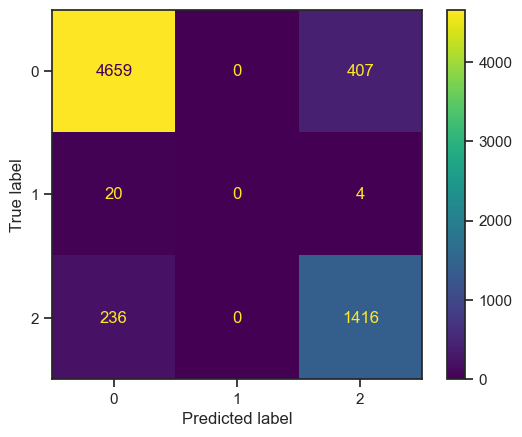

In [227]:
conf_matrix_plot(rf_cv.best_estimator_, X_test, y_test)

In [302]:
best_pred_rf = rf_cv.best_estimator_.predict(X_test)
average = "weighted"
accuracy = accuracy_score(y_test, best_pred_rf)
recall = recall_score(y_test, best_pred_rf, average=average)
precision = precision_score(y_test, best_pred_rf, average=average)
f1 = f1_score(y_test, best_pred_rf, average=average)
print("accuracy_score:", accuracy)
print("recall_score:", recall)
print("precision_score:", precision)
print("f1_score:", f1)

accuracy_score: 0.9010679323642836
recall_score: 0.9010679323642836
precision_score: 0.9021807939387251
f1_score: 0.9009577954575931


c:\Users\JoseLuis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [338]:
rf_cv.best_params_
rf_cv_results = make_results("Random Forest Optimizado",rf_cv)
results = pd.concat([rf_cv_results, results])
results.sort_values(by=["F1"], ascending= False)

Model   F1  Precision  Accuracy
0                         Random Forest Optimizado 0.90       0.90      0.90
0  Decision Tree con Optimización por GridSearchCV 0.90       0.90      0.90

### Aplicando un set de validacion al RandomForest

In [229]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=10)

In [231]:
from sklearn.model_selection import PredefinedSplit

In [234]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]

In [241]:
cv_params = {"max_depth":[4,5,6,7,8,9,10,11,12,None],
             "min_samples_leaf":[2,3,5,10],
             "min_samples_split":[2,3,4],
             "max_features":[2,3,4],
             "n_estimators":[75,100,150],
             }
rf_v = RandomForestClassifier(random_state=0, n_jobs=-1 , n_estimators=16)
scoring = {"accuracy":make_scorer(accuracy_score),
           "recall_weighted":make_scorer(recall_score, average='weighted'),
           "f1_weighted":make_scorer(f1_score, average='weighted')}
custom_split = PredefinedSplit(split_index)
rf_v_cv = GridSearchCV(rf_v, cv_params, scoring=scoring, cv=5,refit="f1_weighted",verbose=5)

rf_v_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; accuracy: (test=0.867) f1_weighted: (test=0.866) recall_weighted: (test=0.867) total time=   2.4s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; accuracy: (test=0.875) f1_weighted: (test=0.875) recall_weighted: (test=0.875) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; accuracy: (test=0.867) f1_weighted: (test=0.867) recall_weighted: (test=0.867) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; accuracy: (test=0.869) f1_weighted: (test=0.869) recall_weighted: (test=0.869) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; accuracy: (test=0.871) f1_weighted: (test=0

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=16, n_jobs=-1,
                                              random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [2, 3, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 150]},
             refit='f1_weighted',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_weighted': make_scorer(f1_score, average=weighted),
                      'recall_weighted': make_scorer(recall_score, average=weighted)},
             verbose=5)

In [280]:
rf_v_cv.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [251]:
print("Best Avg.Validation score: ", "%.4f" % rf_v_cv.best_score_)
### Base de datos con los modelos probados

Best Avg.Validation score:  0.9028


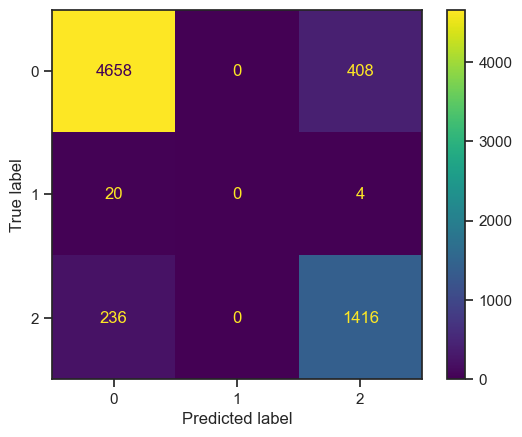

In [253]:
conf_matrix_plot(rf_v_cv.best_estimator_, X_test, y_test)

In [339]:
rf_v_cv.best_params_
rf_v_cv_results = make_results("Random Forest Optimizado con validación",rf_v_cv)
results = pd.concat([rf_v_cv_results, results])
results.sort_values(by=["F1"], ascending= False, ignore_index=True)

Model   F1  Precision  Accuracy
0          Random Forest Optimizado con validación 0.90       0.90      0.90
1                         Random Forest Optimizado 0.90       0.90      0.90
2  Decision Tree con Optimización por GridSearchCV 0.90       0.90      0.90

# 5.3 XGBC Classifier o Modelo BlackBox

In [316]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, make_scorer

### 5.2.2 Preparación de datos de modelo

In [318]:
tigo_df_model3 = tigo_df_v1.copy()
tigo_df_model3 = pd.get_dummies(tigo_df_model3, columns=["digital_user"])
tigo_df_model3 = pd.get_dummies(tigo_df_model3, columns=["data_active"])
tigo_df_model3 = pd.get_dummies(tigo_df_model3, columns=["network_active"])
tigo_df_model3 = tigo_df_model3.drop("id",axis=1)
tigo_df_model3


voice_min_used  voice_num_calls  sms_used  data_mb_used  revenue   
0                2.57                2         0         84.42     0.00  \
1                0.00                0         0          0.00     0.00   
2                0.00                0         0         17.65     0.35   
3               13.48                5         0        275.02     0.00   
4                0.00                0         0        173.53     0.00   
...               ...              ...       ...           ...      ...   
26963            0.00                0         0          0.00     0.00   
26964            0.00                0         0          0.00     0.00   
26965            0.00                0         0         18.91     0.00   
26966            4.35                2         0          0.00     0.00   
26967            0.00                0         0          0.00     0.00   

       antigüedad_cliente  clase  digital_user_NO  digital_user_SI   
0                    4490      0            False             True  \
1                    4486      0            False             True   
2                    4427      0            False             True   
3                    4483      0            False             True   
4                    4482      0            False             True   
...                   ...    ...              ...              ...   
26963                  90      2            False             True   
26964                  66      2            False             True   
26965                1602      2            False             True   
26966                1317      2            False             True   
26967                 174      2             True            False   

       data_active_0  data_active_1  network_active_0  network_active_1  
0              False           True             False              True  
1               True          False              True             False  
2              False           True             False              True  
3              False           True             False              True  
4              False           True             False              True  
...              ...            ...               ...               ...  
26963           True          False             False              True  
26964          False           True             False              True  
26965          False           True             False              True  
26966           True          False             False              True  
26967           True          False              True             False  

[26968 rows x 13 columns]

In [319]:
y = tigo_df_model3["clase"]
X = tigo_df_model3.copy()
X = X.drop("clase",axis=1)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

In [322]:
cv_params = {"max_depth":[5,6,7,8,9,10,11,12,15],
             "min_child_weight":[2,3,4,5],
             "learning_rate":[0.025,0.05,0.1,0.2,0.3],
             "n_estimators":[75,100,150]
             }
xgb = XGBClassifier(objective="multi:softmax" ,random_state=0, n_jobs=-1 , n_estimators=16)
scoring = {"accuracy":make_scorer(accuracy_score),
           "recall_weighted":make_scorer(recall_score, average='weighted'),
           "f1_weighted":make_scorer(f1_score, average='weighted')}
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5,refit="f1_weighted", verbose= 5)
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END learning_rate=0.025, max_depth=5, min_child_weight=2, n_estimators=75; accuracy: (test=0.898) f1_weighted: (test=0.898) recall_weighted: (test=0.898) total time=   1.6s
[CV 2/5] END learning_rate=0.025, max_depth=5, min_child_weight=2, n_estimators=75; accuracy: (test=0.900) f1_weighted: (test=0.900) recall_weighted: (test=0.900) total time=   1.6s
[CV 3/5] END learning_rate=0.025, max_depth=5, min_child_weight=2, n_estimators=75; accuracy: (test=0.899) f1_weighted: (test=0.899) recall_weighted: (test=0.899) total time=   1.6s
[CV 4/5] END learning_rate=0.025, max_depth=5, min_child_weight=2, n_estimators=75; accuracy: (test=0.900) f1_weighted: (test=0.900) recall_weighted: (test=0.900) total time=   1.6s
[CV 5/5] END learning_rate=0.025, max_depth=5, min_child_weight=2, n_estimators=75; accuracy: (test=0.901) f1_weighted: (test=0.900) recall_weighted: (test=0.901) total time=   1.6s
[CV 1/5] END learning_rate

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     objective='multi:softmax', predictor=None, ...),
             param_grid={'learning_rate': [0.025, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 15],
                  

In [329]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 100}

In [331]:
import pickle



In [332]:
print("Best Avg.Validation score: ", "%.4f" % xgb_cv.best_score_)
### Guardando modelo ya que tomo mucho tiempo conseguirlo. LR=0.1, MD=5, min_child_w = 2, n_stim=100
path = ""
with open(path+"xgb_cv_model_p.pickle", "wb") as to_write:
    pickle.dump(xgb_cv, to_write)

Best Avg.Validation score:  0.9037


In [340]:
xgb_cv.best_params_
xgb_cv_results = make_results("XGBoosted CV",xgb_cv)
results = pd.concat([xgb_cv_results, results])
results.sort_values(by=["F1"], ascending= False, ignore_index=True)

Model   F1  Precision  Accuracy
0                                     XGBoosted CV 0.90       0.90      0.90
1          Random Forest Optimizado con validación 0.90       0.90      0.90
2                         Random Forest Optimizado 0.90       0.90      0.90
3  Decision Tree con Optimización por GridSearchCV 0.90       0.90      0.90

In [324]:
xgb_cv_preds = xgb_cv.predict(X_test)
print("F1 score for test data:", f1_score(y_test, xgb_cv_preds, average='weighted'))

print("Recall score for test data:", recall_score(y_test, xgb_cv_preds, average='weighted'))

print("Precision score for test data:", precision_score(y_test, xgb_cv_preds, average='weighted'))

print("Accuracy score for test data:", accuracy_score(y_test, xgb_cv_preds))

F1 score for test data: 0.9002783139766612
Recall score for test data: 0.9003263126668645
Precision score for test data: 0.9015355348544859
Accuracy score for test data: 0.9003263126668645


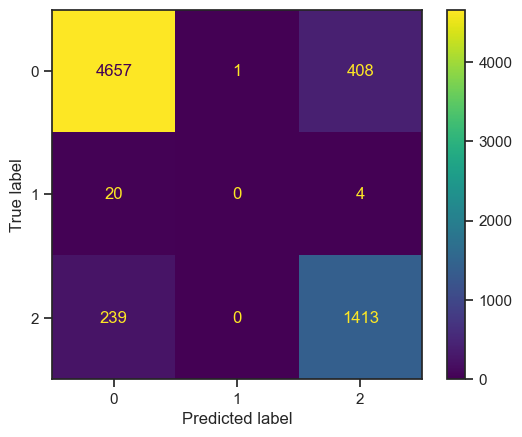

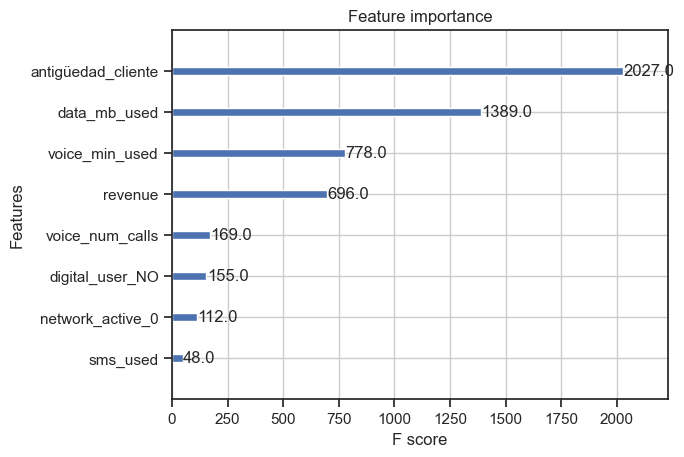

In [326]:
conf_matrix_plot(xgb_cv,X_test,y_test)
plot_importance(xgb_cv.best_estimator_);